In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import layers , models


In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 3096 files belonging to 4 classes.


In [4]:
class_names = dataset.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

In [5]:

len(dataset)

97

In [6]:
import numpy as np

In [7]:
CHANNELS = 3

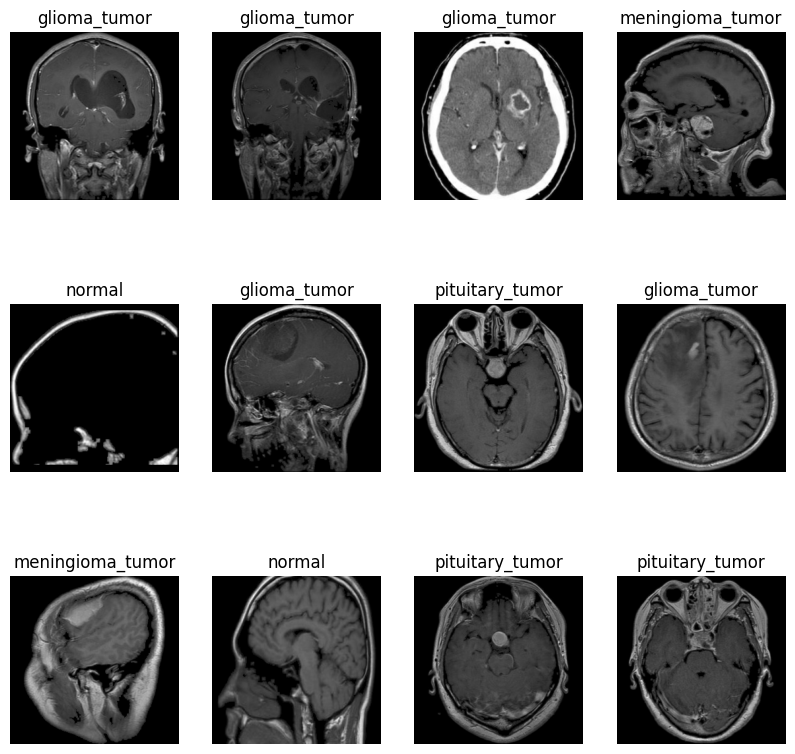

In [8]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [9]:
EPOCH=20

In [10]:
train_size = 0.8
len(dataset)*train_size

77.60000000000001

In [11]:
train_ds = dataset.take(77)
len(train_ds)

77

In [12]:
test_ds = dataset.skip(77)
len(test_ds)

20

In [13]:
val_ds = test_ds.take(10)
len(val_ds)

10

In [14]:
test_ds = test_ds.skip(10)
len(test_ds)

10

In [15]:
def get_dataset_partition_tf(ds , train_split = 0.8 , val_split = 0.1 ,test_split = 0.1 , shuffle = True , shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds= ds.shuffle(shuffle_size , seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds ,test_ds 

In [16]:
train_ds , val_ds ,test_ds = get_dataset_partition_tf(dataset)

In [17]:
len(train_ds)

77

In [18]:

len(val_ds)

9

In [19]:
len(test_ds)

11

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_reshape = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])


In [23]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])


In [25]:
from tensorflow.keras import layers, models

input_shapes = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shapes),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])



In [26]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,956 (1.06 MB)

 Trainable params: 277,956 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']  
)

In [28]:
history = model.fit(
    train_ds,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 80s 900ms/step - accuracy: 0.3386 - loss: 5.2576 - val_accuracy: 0.5799 - val_loss: 0.9628
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 58s 754ms/step - accuracy: 0.5844 - loss: 0.9515 - val_accuracy: 0.6840 - val_loss: 0.8128
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 54s 708ms/step - accuracy: 0.6693 - loss: 0.8538 - val_accuracy: 0.7569 - val_loss: 0.5971
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 49s 637ms/step - accuracy: 0.7744 - loss: 0.6221 - val_accuracy: 0.8194 - val_loss: 0.4950
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 54s 703ms/step - accuracy: 0.8201 - loss: 0.4767 - val_accuracy: 0.8611 - val_loss: 0.4273
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 55s 719ms/step - accuracy: 0.8552 - loss: 0.3789 - val_accuracy: 0.8715 - val_loss: 0.3638
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 53s 690ms/step - accuracy: 0.8955 - loss: 0.2846 - val_accuracy: 0.8576 - val_loss: 0.4023
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 56s 728ms/step - accuracy: 0.9158 - loss: 0.2462 - val_accu

In [29]:

model.save('Brain_tumor.h5')

In [30]:
model = tf.keras.models.load_model('Brain_tumor.h5')

In [31]:

scores = model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 299ms/step - accuracy: 0.9414 - loss: 0.2984


In [32]:

scores

[0.24352063238620758, 0.9545454382896423]

In [33]:
class_names = dataset.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

first image to predict
actual label: glioma_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
predicted label :  glioma_tumor


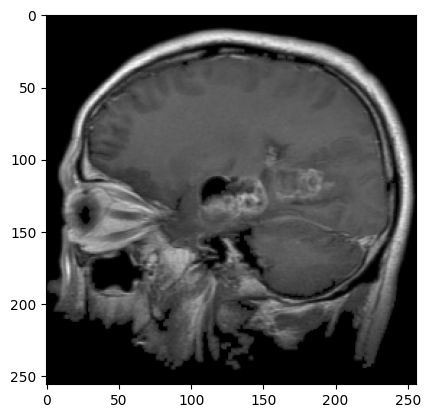

In [34]:
for images_batch , labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('actual label:' , class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print('predicted label : ' , class_names[np.argmax(batch_prediction[0])])


In [35]:

import os

In [36]:

from PIL import Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[1.9138914e-05 9.8988032e-01 1.0093443e-02 7.1280888e-06]]
confidence is : % 98
meningioma_tumor


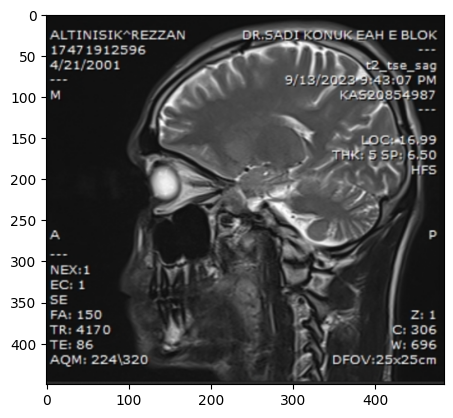

In [51]:

image_path = 'D://ProjeDerin//Training_Models//Test_Brain//10.png'
imag = tf.keras.preprocessing.image.load_img(image_path , target_size=(IMAGE_SIZE,IMAGE_SIZE))
imag_array= tf.keras.preprocessing.image.img_to_array(imag)
x_train = np.expand_dims(imag_array, axis=0)
prediction = model.predict(x_train)
confidence = np.max(prediction)
print(prediction)
print('confidence is : %',int(confidence*100))
print(class_names[np.argmax(prediction)])
img_show = plt.imread(image_path)
plt.imshow(img_show)
plt.show()